# Deploy to Endpoint

In [2]:
import boto3
import sagemaker
import time
from time import strftime

boto_session = boto3.Session()
sagemaker_session = sagemaker.Session(boto_session=boto_session)
sm_client = boto3.client("sagemaker")
region = boto_session.region_name
bucket = sagemaker_session.default_bucket()
role = sagemaker.get_execution_role()
account = sagemaker_session.boto_session.client("sts").get_caller_identity()["Account"]


print(f"account: {account}")
print(f"bucket: {bucket}")
print(f"region: {region}")
print(f"role: {role}")

account: 629171115321
bucket: sagemaker-us-east-1-629171115321
region: us-east-1
role: arn:aws:iam::629171115321:role/service-role/AmazonSageMaker-ExecutionRole-20221203T100950


In [3]:
from sagemaker import get_execution_role
from sagemaker.pytorch import PyTorchModel
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer

## Predictor

In [30]:
import numpy as np
from PIL import Image
import requests
from io import BytesIO

from sagemaker.pytorch import PyTorchPredictor
from sagemaker.serializers import JSONSerializer
from sagemaker.deserializers import JSONDeserializer

Predictor is also not needed to be created again, but today we want to be verbose

In [34]:
predictor_new = PyTorchPredictor(
    endpoint_name="pytorch-inference-test-staging",
    sagemaker_session=sagemaker_session,
    serializer=JSONSerializer(),
    deserializer=JSONDeserializer(),
)

In [38]:
def predict(source):
    if "http" in source:
        # !wget -O image.jpg $source
        response = requests.get(source)
        im = Image.open(BytesIO(response.content))

    else:
        im = Image.open(source).convert("RGB")

    inputs = {"inputs": np.array(im)}

    out = predictor_new.predict(inputs)
    print(out)
    im.show()

{'buildings': 0.999920129776001, 'glacier': 5.853924812981859e-05, 'street': 1.1055176400986966e-05, 'mountain': 8.958169928519055e-06, 'sea': 1.1838544651254779e-06}


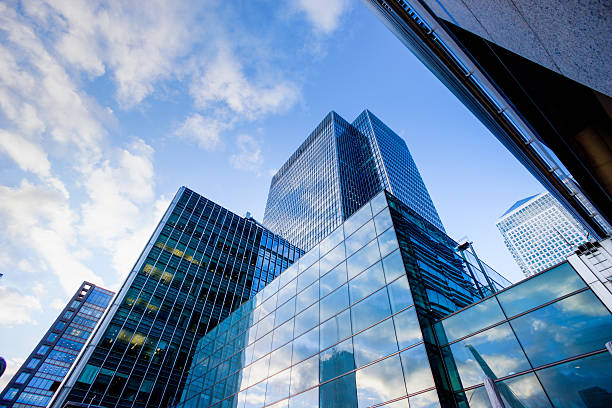

In [36]:
predict("TestImages/building.jpg")

{'forest': 0.9999780654907227, 'glacier': 2.1917174308327958e-05, 'mountain': 2.549754629654899e-09, 'buildings': 2.4885361132875872e-11, 'sea': 1.5162031352655703e-11}


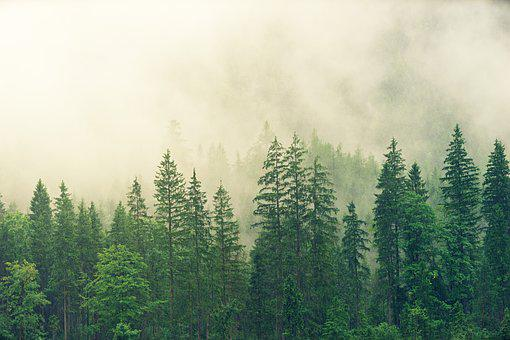

In [46]:
predict("TestImages/forest.jpg")

{'glacier': 0.9999978542327881, 'sea': 1.6017818325053668e-06, 'mountain': 5.797502353743766e-07, 'forest': 5.801686353557045e-10, 'buildings': 2.6980501166562476e-10}


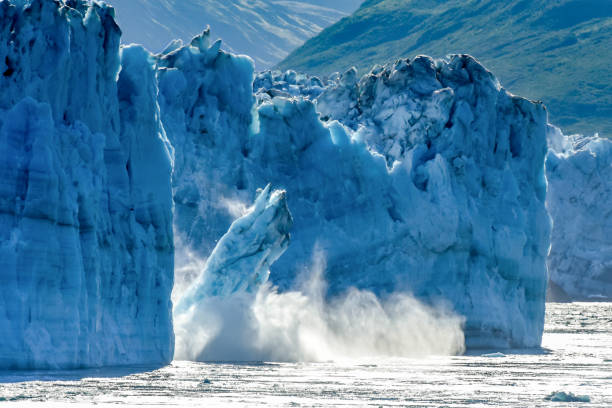

In [47]:
predict("TestImages/glacier.jpg")

{'mountain': 0.9902510643005371, 'glacier': 0.009746378287672997, 'buildings': 1.5160413795456407e-06, 'sea': 7.224800242511265e-07, 'forest': 3.5484626437209954e-07}


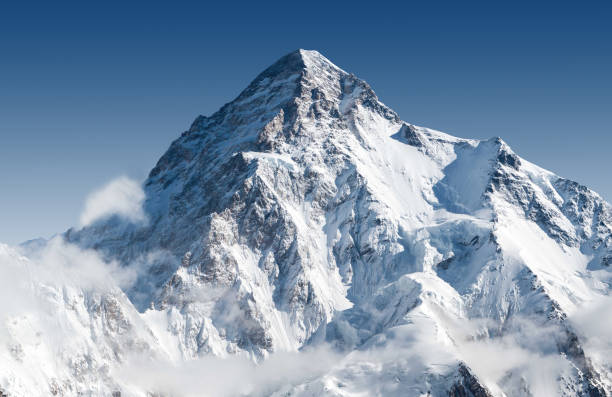

In [48]:
predict("TestImages/mountain.jpg")

{'sea': 0.998496413230896, 'glacier': 0.0014278928283602, 'mountain': 7.44687786209397e-05, 'forest': 1.0408871276013087e-06, 'buildings': 1.213793723309209e-07}


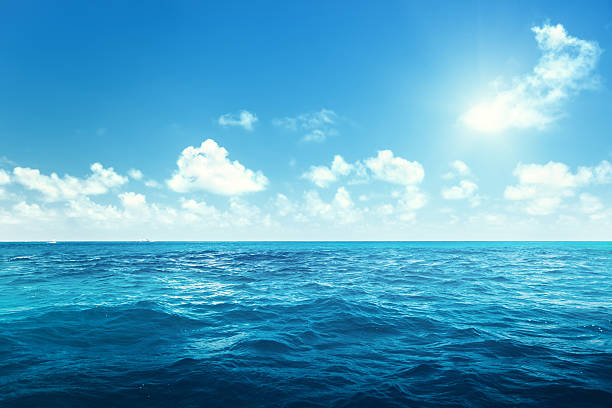

In [50]:
predict("TestImages/sea.jpg")

{'glacier': 0.9616720676422119, 'mountain': 0.038218267261981964, 'sea': 0.0001035011955536902, 'forest': 4.31004582424066e-06, 'buildings': 1.82063536158239e-06}


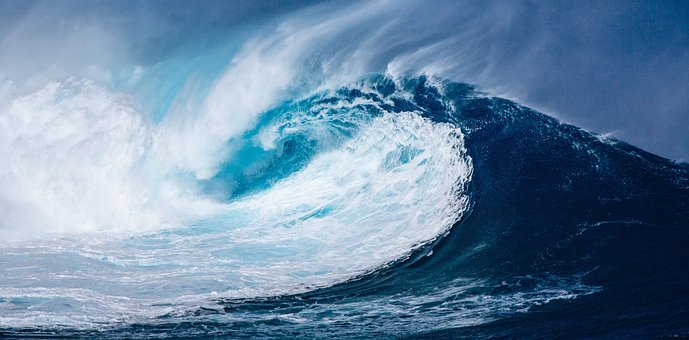

In [45]:
predict("https://cdn.pixabay.com/photo/2016/12/17/14/33/wave-1913559__340.jpg")

{'buildings': 0.9999775886535645, 'glacier': 1.3064054655842483e-05, 'sea': 7.821799044904765e-06, 'street': 1.0973568578265258e-06, 'forest': 3.6190991181683785e-07}


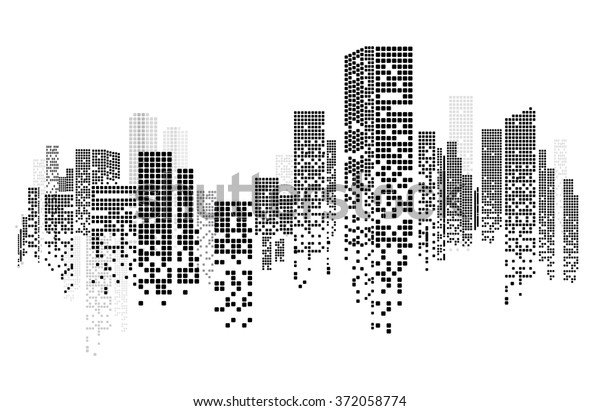

In [43]:
predict(
    "https://www.shutterstock.com/image-vector/building-city-illustration-scene-on-600w-372058774.jpg"
)

{'sea': 0.998496413230896, 'glacier': 0.0014278928283602, 'mountain': 7.44687786209397e-05, 'forest': 1.0408871276013087e-06, 'buildings': 1.213793723309209e-07}


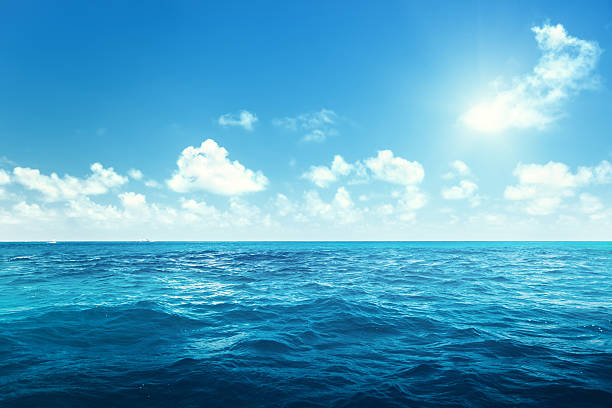

In [52]:
predict("TestImages/sea.jpg")

{'street': 0.9973003268241882, 'buildings': 0.0026952631305903196, 'forest': 3.6850187825621106e-06, 'glacier': 6.503328222606797e-07, 'sea': 6.337366187381122e-08}


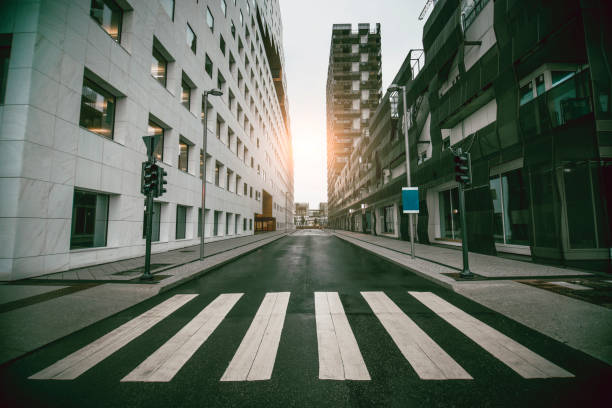

In [53]:
predict("TestImages/street.jpg")